# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

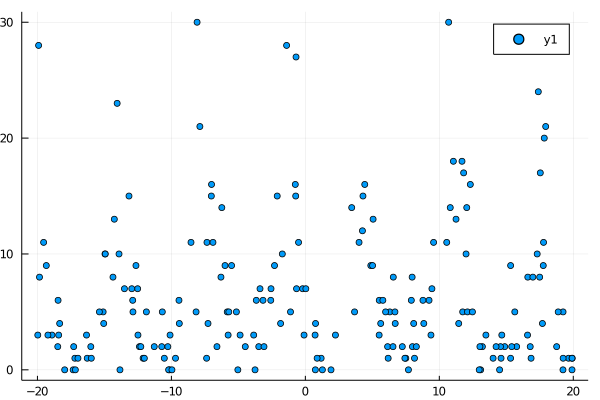

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -576.4129346849504
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.426096 seconds (7.47 M allocations: 476.231 MiB, 98.01% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.7073704867433629, 0.41356564732830364, 0.5708987140111929, 0.31198193648966144, 0.2387795893625723, 0.4034635477233027, 0.18210902876308224, 0.5544116621037667, 0.2977248550134296, 0.5105741599887061  …  0.23617504633482295, 0.21816125164152605, 0.5612872237804086, 0.3629706697616117, 0.2142552067590758, 0.4779523926588189, 0.5569669232428911, 0.20595786470327315, 0.17050194107184616, 0.5174867364573231], θ = [2.400720365931985, 4.929932932425677, 7.789572163838746, 6.4477862570732825, 3.483464693877785, 14.306454061368383, 3.490359225756935, 4.8757460416641, 4.467051987206719, 3.915311697800154  …  3.9815102423620714, 3.984210368202357, 3.4109177840070237, 3.956655067739434, 5.479056211580193, 5.888331012680065, 2.437316277607089, 4.9824002179368225, 5.486714453002014, 12.717455363158212]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTup

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -747.9957682106063
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.445546 seconds (4.37 M allocations: 309.142 MiB, 11.92% gc time, 97.03% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.01251862833299) infered by Analytic Variational Inference , (local_vars = (c = [0.8576144752233835, 0.3435048234592114, 0.5464837637953237, 0.20165997531827998, 0.318070688263554, 0.3293182582645787, 0.24107600658633357, 0.525078665077118, 0.43199076864581964, 0.6984168080875562  …  0.17236097704939823, 0.3565890805747894, 0.7715302206956022, 0.5641199476875033, 0.33556888336563184, 0.42380953709987407, 0.7413041795777829, 0.3032896653369557, 0.29138389484720767, 0.48175631930630813], θ = [4.538841695005089, 5.442475116554182, 7.907747647260067, 7.238149300190805, 4.866573866130406, 14.830897348145808, 4.776882040209484, 5.020803419875987, 6.042832059838784, 5.888232739086952  …  4.991230967307693, 5.459841603350939, 5.482949101352309, 5.7403792929190285, 6.90764547899425, 6.204681319756666, 4.4728655678494675, 6.35995297617282, 6.878095086253482, 12.957362638127123], γ = [9.627368557795243, 5.9917716556192175, 5.207150905

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

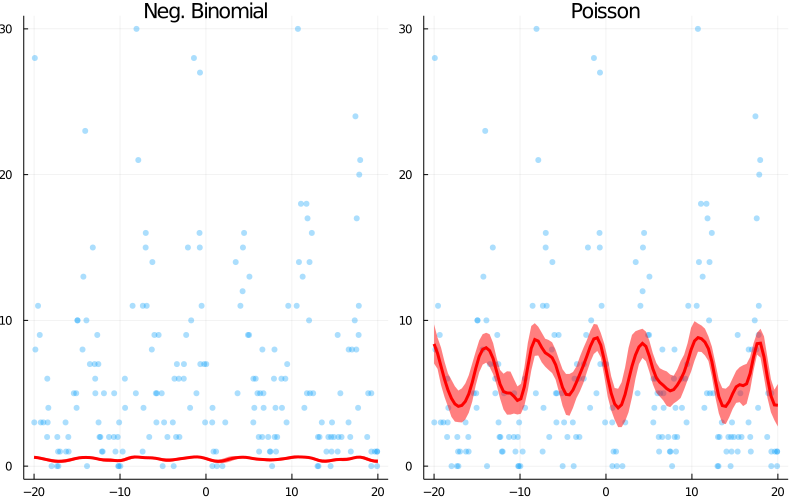

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*